## SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

### 20PAIC53J- MACHINE LEARNING AND SUPERVISED CLASSIFICATION

Read the “data” dataset to perform the following

In [4]:
# importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### 1. Data Understanding (5 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What do you understand from the dataset? (1 MARK)


In [8]:
df = pd.read_csv("data.csv")

In [10]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


The dataset appears to be related to breast cancer diagnosis, containing measurements of cell nuclei from digitized images of fine needle aspirates (FNA) of breast masses. Each row represents a patient case, and the target variable is diagnosis, which takes values 'M' (Malignant) or 'B' (Benign). The features include various statistical metrics (mean, worst, standard error) of attributes like radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension. These are all numeric predictors, and the dataset is well-suited for a binary classification task using models like Decision Trees, Logistic Regression, or SVM.

b. Calculate five-point summary for numerical variables (1 MARK)

In [13]:
#Droping non numeric column(diagnosis) & nominal identifier(id)
numeric_df = df.drop(columns=["id", "diagnosis"])

#Five point summary
five_point_summary = numeric_df.describe().loc[["min", "25%", "50%", "75%", "max"]]
print(five_point_summary)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
min       6.9810          9.71           43.79      143.5          0.05263   
25%      11.7025         16.17           75.17      420.3          0.08637   
50%      13.3200         18.84           86.24      551.1          0.09587   
75%      15.9775         21.80          104.10      782.7          0.10530   
max      28.1100         39.28          188.50     2501.0          0.16340   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
min           0.01938         0.00000              0.00000         0.1060   
25%           0.06492         0.02956              0.02031         0.1619   
50%           0.09263         0.06154              0.03350         0.1792   
75%           0.13040         0.13070              0.07400         0.1957   
max           0.34540         0.42680              0.20120         0.3040   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
min

c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)


In [21]:
#Count of each category
category_counts = df["diagnosis"].value_counts()

#Percentage of each category
category_percentage = df["diagnosis"].value_counts(normalize=True) * 100

In [23]:
#Summary Table
summary = pd.DataFrame({
    "counts": category_counts,
    "Percentage": category_percentage.round(2)
})

print(summary)

           counts  Percentage
diagnosis                    
B             357       62.74
M             212       37.26


d. Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (2 marks)


In [31]:
#Total  issing values in columns
missing_summary = df.isnull().sum()

#Any missing values?
print("Any missing values?", df.isnull().values.any())
print(missing_summary[missing_summary > 0])

Any missing values? True
radius_mean     7
radius_se      11
dtype: int64


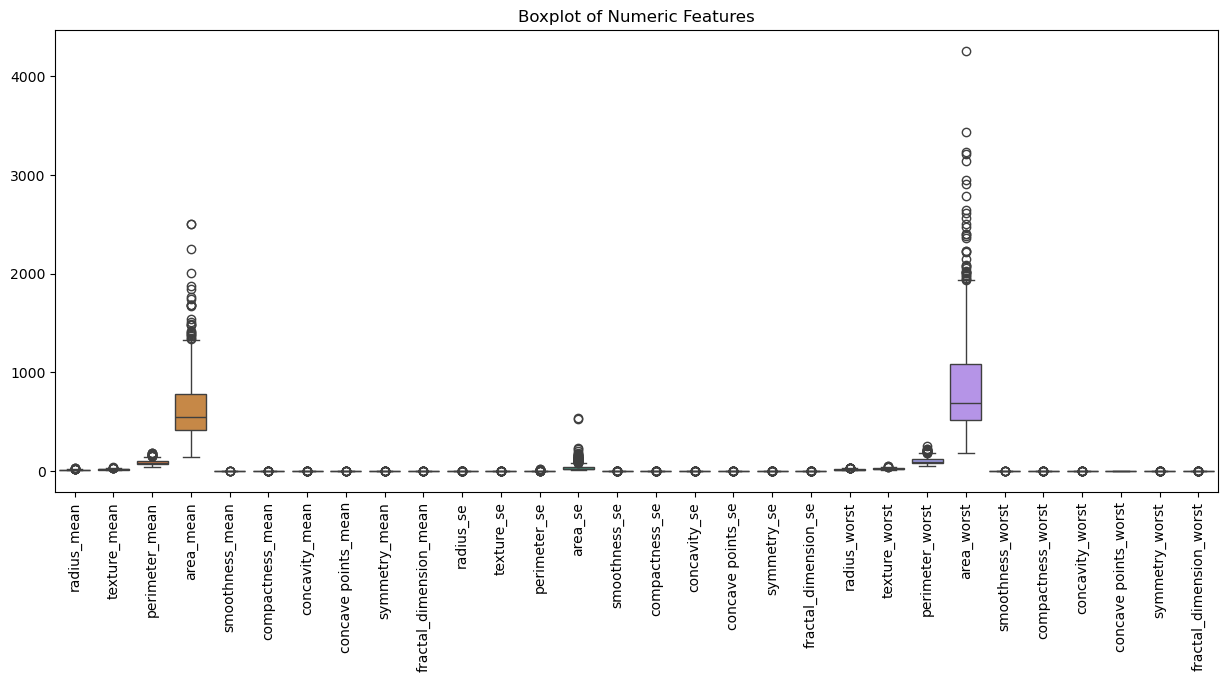

In [27]:
#Check for outliers

#Using only numeric columns & Boxplot for visual inspection 
plt.figure(figsize=(15, 6))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

###  2.  Data Preparation (15 marks)


a. Fix the defects if any and do appropriate treatment if any. (4 marks)

In [35]:
#Impute the dataset with median()
df["radius_mean"].fillna(df["radius_mean"].median(), inplace=True)
df["radius_se"].fillna(df["radius_se"].median(), inplace=True)

/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_2769/1921678133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["radius_mean"].fillna(df["radius_mean"].median(), inplace=True)
/var/folders/9_/jzbpn_d578l55nyn4xxfy3f80000gn/T/ipykernel_2769/1921678133.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [41]:
#Recheck for missing values
df.isnull().values.any()

False

In [43]:
#Class Imbalance
model = DecisionTreeClassifier(class_weight = "balanced")

b. Visualize the data using relevant plots and explain the idea behind your choice of plot. Find out the variables which are highly correlated with Target? (4 marks)

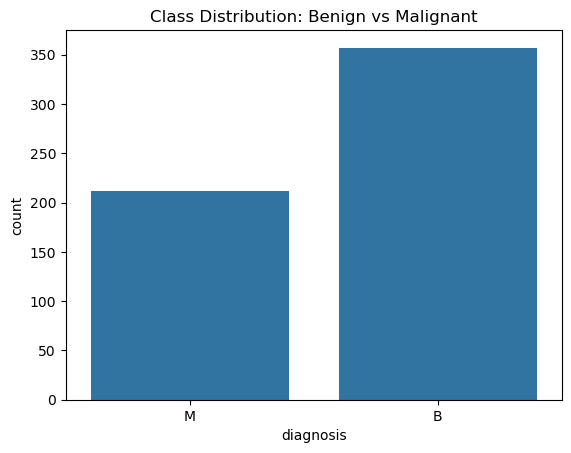

In [45]:
#Class distribution(Bar plot)
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution: Benign vs Malignant")
plt.show()

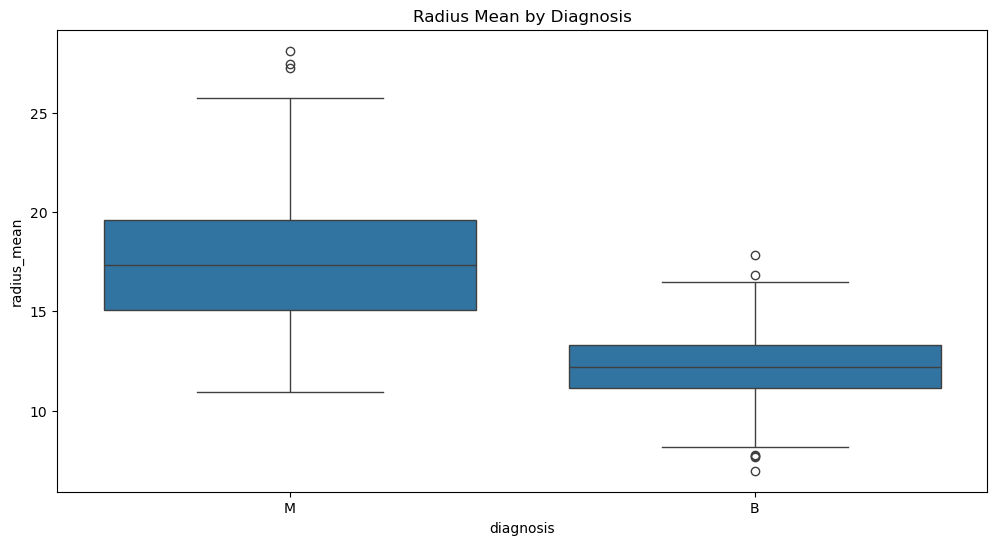

In [47]:
#Box plots for feature distributions by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Radius Mean by Diagnosis")
plt.show()

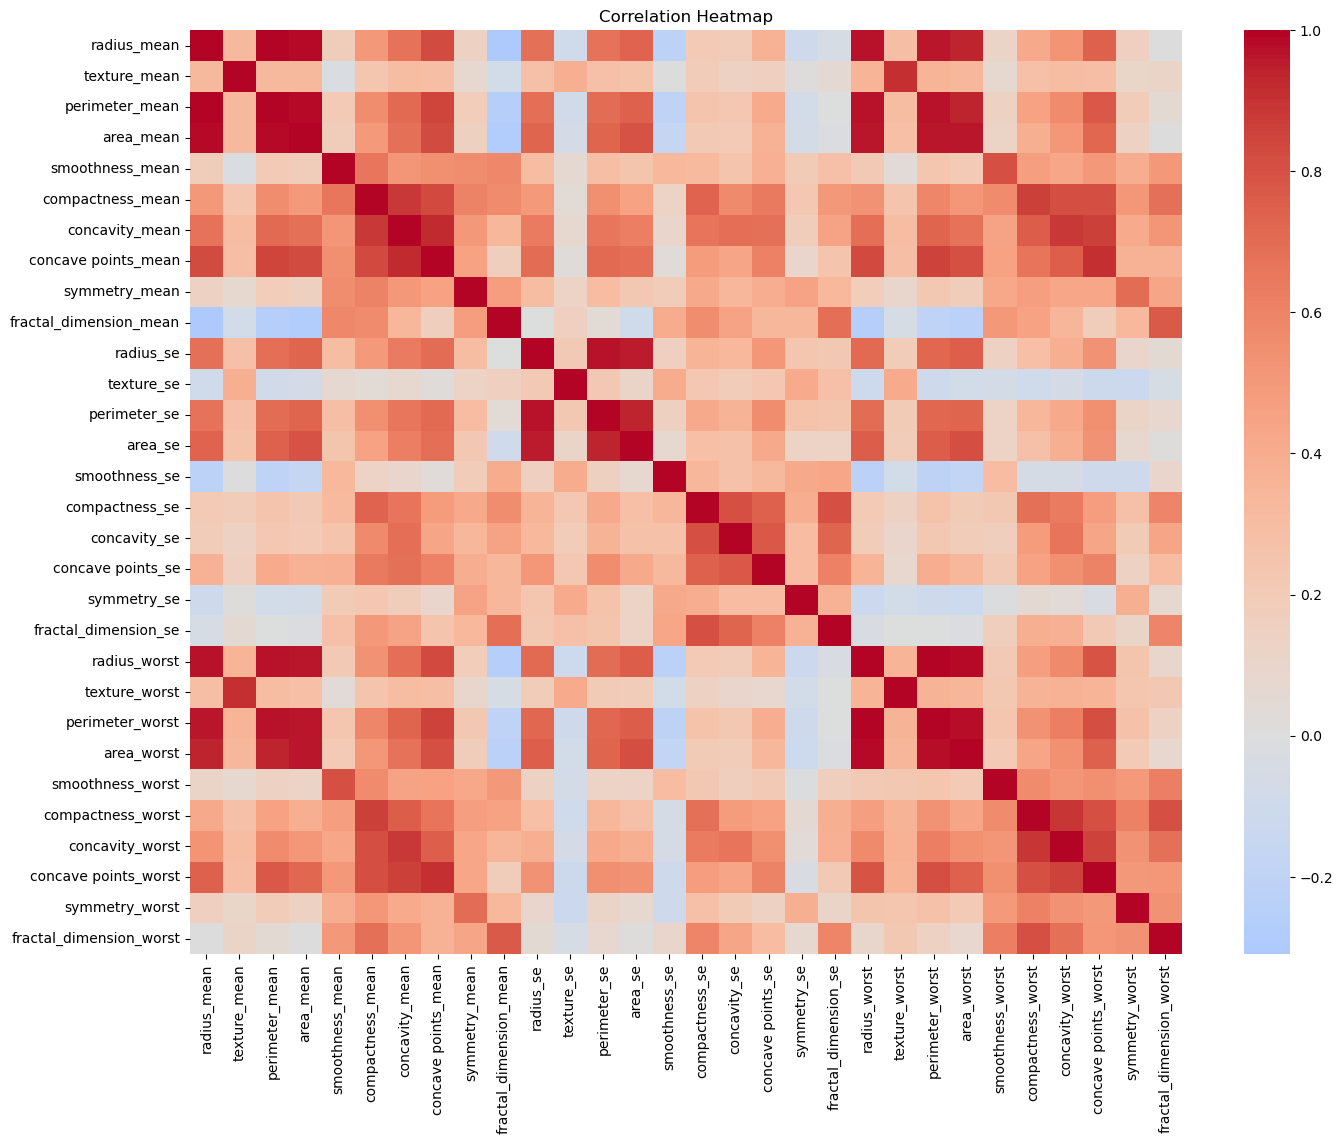

In [53]:
#Heatmap for feature correlation
plt.figure(figsize=(16, 12))
corr = df.drop(columns=['id', "diagnosis"]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [71]:
#Encode Target
df["diagnosis_encoded"] = df["diagnosis"].map({"B": 0, "M": 1})

#Compute correlation
correlations = df.drop(columns=["diagnosis", "id"]).corr()["diagnosis_encoded"].drop(["diagnosis_encoded"])
top_corr = correlations.abs().sort_values(ascending=False)
print(top_corr.head(5))

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: diagnosis_encoded, dtype: float64


These features have strong positive correlation with malignancy.
Higher values in these features are strong indicators of malignant tumors.
They are excellent candidates for:
    Feature selection
    Model interpretation
    Visualization (e.g., boxplots or violin plots by class)

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? Tell us the reason behind your choice of action.(4 marks)

In [74]:
#Variables to exclude
X = df.drop(columns=['id', 'diagnosis', 'diagnosis_encoded'])
y = df['diagnosis_encoded']

No Need for Feature Scaling:
Decision Trees do not require feature scaling or normalization — they split based on thresholds, not distances.

No Need to Drop Correlated Features:
Decision Trees handle multicollinearity well. Even if features are highly correlated,
the tree will choose the most informative one at each split.

In [78]:
#Handle Class imbalance
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)


d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [82]:
#Split the Dataset (70:30 with Stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [84]:
#Compare class distribution
# Overall distribution
print("Full dataset:", y.value_counts(normalize=True) * 100)

# Train distribution
print("Train set:", y_train.value_counts(normalize=True) * 100)

# Test distribution
print("Test set:", y_test.value_counts(normalize=True) * 100)

Full dataset: diagnosis_encoded
0    62.741652
1    37.258348
Name: proportion, dtype: float64
Train set: diagnosis_encoded
0    62.81407
1    37.18593
Name: proportion, dtype: float64
Test set: diagnosis_encoded
0    62.573099
1    37.426901
Name: proportion, dtype: float64


The class proportions in both train and test sets closely match the full dataset. The differences are less than 0.2%, which is statistically negligible. This confirms that both subsets are representative of the overall data.

The dataset was split into 70% training and 30% testing using stratified sampling. A comparison of class distributions shows that both subsets closely mirror the full dataset, with less than 0.2% deviation. This confirms that the train and test sets are statistically representative, ensuring fair and unbiased model evaluation.

### 3. Model Building (20 marks)

a. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set (4 marks)


In [92]:
#Defining Features & Target
X = df.drop(columns=["id", "diagnosis", "diagnosis_encoded"])
y = df["diagnosis_encoded"]

#Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

#Decision Tree model using GINI criterion
model = DecisionTreeClassifier(criterion="gini", class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

#Count correct predictions
correct_predictions = (y_pred == y_test).sum()
print("Correctly Predicted Samples in test set:",correct_predictions)

Correctly Predicted Samples in test set: 155


In [94]:
print("Test set size:", len(y_test))

Test set size: 171


This means the model correctly classified 155 out of the 171 test samples, showing strong initial performance.

 b. What is the overall Accuracy? Please comment on it (3 mark)

In [106]:
accuracy = accuracy_score(y_pred, y_test)
print("Overall Accuracy:", round(accuracy * 100, 2), "%")

Overall Accuracy: 90.64 %


Accuracy: 90.64%

This means the model correctly classified over 90% of the test samples.
For a medical diagnosis task, this is a strong baseline, especially using a simple Decision Tree.
However, accuracy alone doesn’t tell us how well the model handles class imbalance or false negatives (misclassifying malignant tumors as benign).

c. Evaluate the model built using Precision, Recall and F1 Score and interpret the results with inferences (4 marks)


In [110]:
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.91      0.94      0.93       107
   Malignant       0.90      0.84      0.87        64

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



d. Build a logistic regression model and compare the performance of the same with decision tree. What are your inferences?

In [118]:
from sklearn.linear_model import LogisticRegression

#Train a logistic Regression model
log_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

#Prediction in test set
y_pred = log_model.predict(X_test)

#accuracy
log_accuracy = accuracy_score(y_test, y_pred)
print("Log_model overall accuracy:", round(log_accuracy * 100, 2), "%")

Log_model overall accuracy: 93.57 %


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
#Log_model evaluation
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.92      0.98      0.95       107
   Malignant       0.96      0.86      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



Logistic Regression achieved higher accuracy (93.57%) and stronger precision/recall for malignant tumors compared to the Decision Tree. This suggests it generalizes better and is more reliable for medical classification tasks. While Decision Trees offer interpretability, Logistic Regression is preferred here for its superior predictive performance and robustness.